In [1]:
# Importing the modules that i’ll be using in this project:

import pandas as pd
#import pandas_profiling не установлен
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
# loading the data
df = pd.read_csv('C:\\Users\Mr. Chernyaev\Downloads\\WorldCupMatches.csv')
df['Year'] = df['Year'].fillna(0)
df['Year'] = df['Year'].astype('int')
print(df.head(5))
#print(df.describe())
#print(df.profile_report())


   Year              Datetime    Stage         Stadium         City  \
0  1930  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0.0   
1     

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'Total goals'],
      dtype='object')


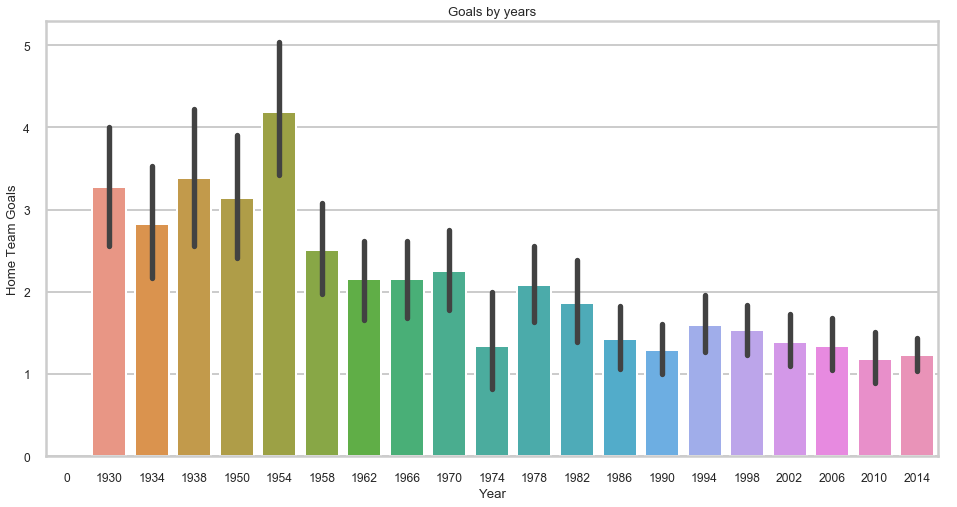

In [3]:
# goal scoring overview
df['Total goals'] = df['Home Team Goals'] + df['Away Team Goals']

sns.set_style('whitegrid')
sns.set_context('poster', font_scale = 0.55)
f, ax = plt.subplots(figsize=(16, 8))
sns.barplot(
    y = df['Home Team Goals'],
    x = df['Year'],
    data = df
)
ax.set_title('Goals by years')
#plt.show()
print(df.columns)

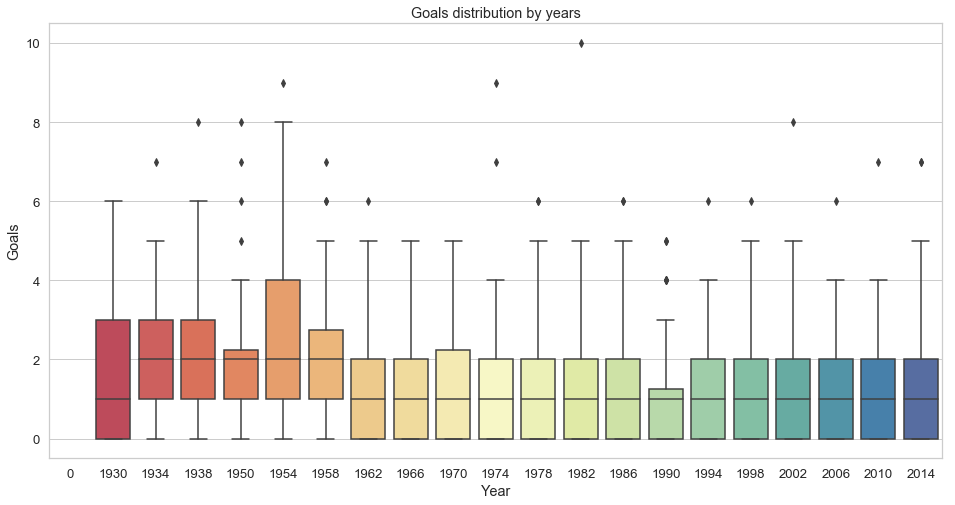

In [7]:
# creating boxplot for visualisation: how many goals were scored each year the World Cup was held between 1930-2014.

df_goals_Home = df[['Year','Home Team Goals']].copy()
df_goals_Home.columns = ['Year', 'Goals']  # first options of rename
df_goals_Home['home/away'] = 'home'

df_goals_Away = df[['Year','Away Team Goals']].copy()
df_goals_Away.rename(columns={ # second options of rename
    'Away Team Goals': 'Goals'
    },
    inplace=True # modifying current dataset without creating a new one
)
df_goals_Away['home/away'] = 'away'
#print(df_goals_Home.head(5))
#print(df_goals_Away.head(5))
#new = pd.pivot_table(df_goals, index='Year', values= ['Home Team Goals', 'Away Team Goals']).reset_index()
#print(df_goals.head(5))
#print(new.head(5))

plt.close('all')

df_ah = pd.concat([df_goals_Home, df_goals_Away]) # mixing the data
#print(df_ah)

f, ax2 = plt.subplots(figsize=(16, 8))
ax2 = sns.boxplot(
    data=df_ah, 
    x='Year', 
    y='Goals',
    palette = 'Spectral' )

ax2.set_title('Goals distribution by years')
sns.set_context('notebook', font_scale=1.2)
plt.show()